# Accumulation radar - investigation year
***
### Start date: November 6th, 2020 at 16h40

### To process ice slabs, I need the following key elements
- A radar echogram matrix (n,m), where the radar echo at any nth depth and mth horizontal distance is recorded
- A 2 way-travel time vector (n) to compute the depth
- A latitude vector (m) to retreive the location
- A longitude vector (m) to retreive the location
- The 'roll' of the aircraft to compute roll correction of the radar signal

In the table below I summarize for each year of data I am inzteresting in mapping ice slabs if these variables are present, and what are their names:

|      2003      |      2003      |     2003       |            2003            |
|----------------|----------------|----------------|----------------------------|
|`may09_03_3.mat`|`may12_03_1.mat`|`may12_03_2.mat`|`may12_03_gpslatlontime.mat`|
|       /        |       /        |       /        |          seconds           |
|       /        |       /        |       /        |          useconds          |
|       /        |       /        |       /        |          lat_gps           |
|       /        |       /        |       /        |          lon_gps           |
|       /        |       /        |       /        |          time_gps          |
|    filtfi      |    filtfi      |    filtfi      |             /              |
|    timearr     |    timearr     |    timearr     |             /              |



| May 09th 2003 | May 11th 2003 | May 12th 2003 | May 13th 2003 | May 14th 2003 | May 15th 2003 || DATA May 15th 2003 |
|---------------|---------------|---------------|---------------|---------------|---------------||------------------- |
|`may09_03_gpslatlontime.mat`|`may11_03_gpslatlontime.mat`|`may12_03_gpslatlontime.mat`|`may13_03_gpslatlontime.mat`|`may14_03_gpslatlontime.mat`|`may15_03_gpslatlontime.mat`||`may09_03_3.mat`|
|    seconds    |    seconds    |    seconds    |    seconds    |    seconds    |    seconds    ||          /         |
|    useconds   |    useconds   |    useconds   |    useconds   |    useconds   |    useconds   ||          /         |
|    lat_gps    |    lat_gps    |    lat_gps    |    lat_gps    |    lat_gps    |    lat_gps    ||          /         |
|    lon_gps    |    lon_gps    |    lon_gps    |    lon_gps    |    lon_gps    |    lon_gps    ||          /         |
|    time_gps   |    time_gps   |    time_gps   |    time_gps   |    time_gps   |    time_gps   ||          /         |
|       /       |       /       |       /       |       /       |       /       |       /       ||        filtfi      |
|       /       |       /       |       /       |       /       |       /       |       /       ||        timearr     |


| 2002 | 2002 | 2002 | 2002 | 2002 | 2002 | 2002 | 2002 | 2010 |
|------|------|------|------|------|------|------|------|------|
|   `may18_02_gps_latlontime.mat`   |   `may18_02_3.mat`    |   `may24_02s_latlontime.mat`   |   `may24_02_3.mat`   |   `may30_02_latlontime.mat`   |   `may30_02_3.mat`   |   `jun04_02_latlontime.mat`   |   `jun04_02proc_3.mat`   | `Data_20100507_01_009.mat` |
| seconds   |    /    | seconds   |    /    | seconds  |     /     | seconds  |     /     | Time |
| lat_gps   |    /    | lat_gps   |    /    | lat_gps  |     /     | lat_gps  | latitude  | Latitude |
| lon_gps   |    /    | lon_gps   |    /    | lon_gps  |     /     | lon_gps  | longitude | Longitude |
| alt_gps   |    /    | elh       |    /    | elh      |     /     | elh      |     /     | Elevation |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     |  Roll |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     | Pitch |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     | Heading |
| time_gps  |    /    | time_gps  |    /    | time_gps |     /     | time_gps |     /     | GPS_time |
|   /       |    /    |   /       |    /    |  /       |     /     |    /     |   <font color=blue> data </font>    | <font color=blue> Data </font> |
| useconds  |    /    | useconds  |    /    | useconds |     /     | useconds |     /     |  /  |
|   /       | <font color=blue> filtfin </font> |   /       | <font color=blue> filtfin </font> |   /      |  <font color=blue> filtfin </font>  |    /     |     /     |   /   |
|   /       | timearr |   /       | timearr |   /      |  timearr  |    /     |     /     |   /   |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     | And other parameters |

|  Variable  |   2002   |   2003   |   2009   |   2010   |   2011   |   2012   |   2013   |   2014   |   2017   |
| ---------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
|  Latitude  |     no   |   no  |     |     |     |     |     |     |
|  Longitude |     no   |     |     |     |     |     |     |     |
|  2-w time  |     no   |     |     |     |     |     |     |     |
|  Echogram  |    yes   |     |     |     |     |     |     |     |     |
|    Roll    |     no   |     |     |     |     |     |     |     |


## 2002 data:
Data available at: ftp://data.cresis.ku.edu/data/accum/old_format/2002/


In [16]:
import scipy.io
import rasterio
from matplotlib import pyplot
import numpy as np
import h5py
import matplotlib.colors as mcolors

### Investigate the 4 masterfiles of 2002 to see if we can retreive any information about the time

For Jun 04 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, elh, time_gps
For May 18 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, time_gps, alt_gps
For May 24 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, elh, time_gps
For May 30 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, elh, time_gps
 
The length of the gps time vector for May 18 is: 39293
The length of the gps time vector for May 24 is: 35733
The length of the gps time vector for May 30 is: 58182
The length of the gps time vector for Jun 04 is: 55636


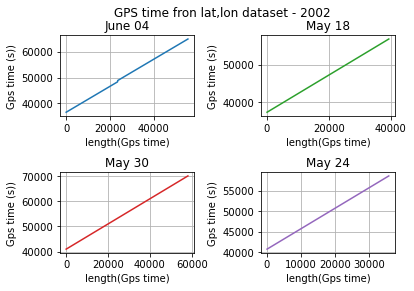

In [23]:
#Load lat,lon data
june04_2002 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//jun04_02_latlontime.mat')
may18_2002 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may18_02_gps_latlontime.mat')
may24_2002 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may24_02_latlontime.mat')
may30_2002 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may30_02_latlontime.mat')

#print(june04_2002)
print('For Jun 04 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, elh, time_gps')

#print(may18_2002)
print('For May 18 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, time_gps, alt_gps')

#print(may24_2002)
print('For May 24 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, elh, time_gps')

#print(may30_2002)
print('For May 30 2002, we have six variables stored in it: seconds, useconds, lat_gps, lon_gps, elh, time_gps')
print(' ')

#Store data for june 04 in different vectors
june04_sec=june04_2002['seconds']
june04_usec=june04_2002['useconds']
june04_lat_gps=june04_2002['lat_gps']
june04_lon_gps=june04_2002['lon_gps']
june04_elhh=june04_2002['elh']
june04_time_gps=june04_2002['time_gps']

#Store time data
june04_time_gps=june04_2002['time_gps']
may18_time_gps=may18_2002['time_gps']
may24_time_gps=may24_2002['time_gps']
may30_time_gps=may30_2002['time_gps']

#Print the lengths of the gps times
print('The length of the gps time vector for May 18 is: ' + str(may18_time_gps.shape[1]))
print('The length of the gps time vector for May 24 is: ' + str(may24_time_gps.shape[1]))
print('The length of the gps time vector for May 30 is: ' + str(may30_time_gps.shape[1]))
print('The length of the gps time vector for Jun 04 is: ' + str(june04_time_gps.shape[1]))

#Create the x vector to plot
x_vec_june04=june04_time_gps[:1]
x_june04=np.arange(x_vec_june04.size)

x_vec_may18=may18_time_gps[:1]
x_may18=np.arange(x_vec_may18.size)

x_vec_may24=may24_time_gps[:1]
x_may24=np.arange(x_vec_may24.size)

x_vec_may30=may30_time_gps[:1]
x_may30=np.arange(x_vec_may30.size)

#Plot the GPS time
fig, axs = pyplot.subplots(2, 2)
axs[0, 0].plot(x_june04,june04_time_gps.reshape((x_vec_june04.size,)),'tab:blue')
axs[0, 0].set_title('June 04')
axs[0, 0].grid()
axs[0, 1].plot(x_may18,may18_time_gps.reshape((x_vec_may18.size,)), 'tab:green')
axs[0, 1].set_title('May 18')
axs[0, 1].grid()
axs[1, 0].plot(x_may30,may30_time_gps.reshape((x_vec_may30.size,)), 'tab:red')
axs[1, 0].set_title('May 30')
axs[1, 0].grid()
axs[1, 1].plot(x_may24,may24_time_gps.reshape((x_vec_may24.size,)), 'tab:purple')
axs[1, 1].set_title('May 24')
axs[1, 1].grid()

fig.suptitle('GPS time fron lat,lon dataset - 2002')

for ax in axs.flat:
    ax.set(xlabel='length(Gps time)', ylabel='Gps time (s))')

pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.7)

I thought in a first place that the GPS time given in the lat_lon_time dataset was maybe the time related to the signal penetration, each time array related to each subtrack being aggregated into a big array, However, because the GPS time is increasing linearly, it means this is not the time related to the signal penetration (otherwise I would have seen increase related to the signal penetration depth, then go back to a value that correpsonds to the surface and increasing lineraly and do on).
### Let's investigate seconds, useconds elh and alt_gps variables

The length of the seconds vector for May 18 is: 39293
The length of the seconds vector for May 24 is: 35733
The length of the seconds vector for May 30 is: 58182
The length of the seconds vector for Jun 04 is: 55636
 
The length of the useconds vector for May 18 is: 39293
The length of the useconds vector for May 24 is: 35733
The length of the useconds vector for May 30 is: 58182
The length of the useconds vector for Jun 04 is: 55636
 


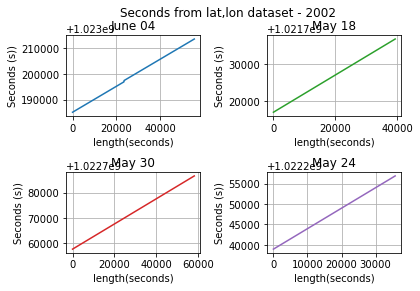

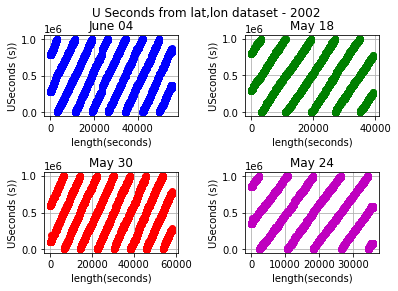

In [18]:
#Store seconds data
june04_sec=june04_2002['seconds']
may18_sec=may18_2002['seconds']
may24_sec=may24_2002['seconds']
may30_sec=may30_2002['seconds']

#Print the lengths of the gps times
print('The length of the seconds vector for May 18 is: ' + str(may18_sec.shape[1]))
print('The length of the seconds vector for May 24 is: ' + str(may24_sec.shape[1]))
print('The length of the seconds vector for May 30 is: ' + str(may30_sec.shape[1]))
print('The length of the seconds vector for Jun 04 is: ' + str(june04_sec.shape[1]))
print(' ')

#Let's use the same x vector to plot

#Plot the seconds
fig, axs = pyplot.subplots(2, 2)
axs[0, 0].plot(x_june04,june04_sec.reshape((june04_sec.size,)),'tab:blue')
axs[0, 0].set_title('June 04')
axs[0, 0].grid()
axs[0, 1].plot(x_may18,may18_sec.reshape((may18_sec.size,)), 'tab:green')
axs[0, 1].set_title('May 18')
axs[0, 1].grid()
axs[1, 0].plot(x_may30,may30_sec.reshape((may30_sec.size,)), 'tab:red')
axs[1, 0].set_title('May 30')
axs[1, 0].grid()
axs[1, 1].plot(x_may24,may24_sec.reshape((may24_sec.size,)), 'tab:purple')
axs[1, 1].set_title('May 24')
axs[1, 1].grid()

fig.suptitle('Seconds from lat,lon dataset - 2002')

for ax in axs.flat:
    ax.set(xlabel='length(seconds)', ylabel='Seconds (s))')

pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.7)


#Store useconds data
june04_usec=june04_2002['useconds']
may18_usec=may18_2002['useconds']
may24_usec=may24_2002['useconds']
may30_usec=may30_2002['useconds']

#Print the lengths of the gps times
print('The length of the useconds vector for May 18 is: ' + str(may18_usec.shape[1]))
print('The length of the useconds vector for May 24 is: ' + str(may24_usec.shape[1]))
print('The length of the useconds vector for May 30 is: ' + str(may30_usec.shape[1]))
print('The length of the useconds vector for Jun 04 is: ' + str(june04_usec.shape[1]))
print(' ')

#Let's use the same x vector to plot

#Plot the seconds
fig, axs = pyplot.subplots(2, 2)
axs[0, 0].plot(x_june04,june04_usec.reshape((june04_usec.size,)),'bo')
axs[0, 0].set_title('June 04')
axs[0, 0].grid()
axs[0, 1].plot(x_may18,may18_usec.reshape((may18_usec.size,)),'go')
axs[0, 1].set_title('May 18')
axs[0, 1].grid()
axs[1, 0].plot(x_may30,may30_usec.reshape((may30_usec.size,)), 'ro')
axs[1, 0].set_title('May 30')
axs[1, 0].grid()
axs[1, 1].plot(x_may24,may24_usec.reshape((may24_usec.size,)), 'mo')
axs[1, 1].set_title('May 24')
axs[1, 1].grid()

fig.suptitle('U Seconds from lat,lon dataset - 2002')

for ax in axs.flat:
    ax.set(xlabel='length(seconds)', ylabel='USeconds (s))')

pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.7)

The 4 dates store the same variable, except for May 18: it stores the variables 'alt_gps' and no 'elh', whereas the 3 other dates store 'elh' but no 'alt_gps'

I make the assumption that the data stored are identical, and plot the results herebelow

|Date  | Variable
|------|------
|May 18 | alt_gps
|May 24 | elh
|May 30 | elh
|Jun 04 | elh


The length of the alt_gps vector for May 18 is: 39293
The length of the elh vector for May 24 is: 35733
The length of the elh vector for May 30 is: 58182
The length of the elh vector for Jun 04 is: 55636
 


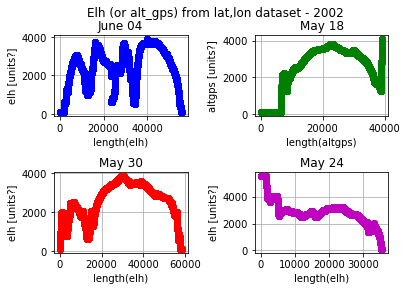

In [19]:
#Store elh data
june04_elh=june04_2002['elh']
may18_altgps=may18_2002['alt_gps']
may24_elh=may24_2002['elh']
may30_elh=may30_2002['elh']

#Print the lengths of the elh and altgps
print('The length of the alt_gps vector for May 18 is: ' + str(may18_altgps.shape[1]))
print('The length of the elh vector for May 24 is: ' + str(may24_elh.shape[1]))
print('The length of the elh vector for May 30 is: ' + str(may30_elh.shape[1]))
print('The length of the elh vector for Jun 04 is: ' + str(june04_elh.shape[1]))
print(' ')

#Plot the GPS time
fig, axs = pyplot.subplots(2, 2)
axs[0, 0].plot(x_june04,june04_elh.reshape((june04_elh.size,)),'bo')
axs[0, 0].set_title('June 04')
axs[0, 0].set(xlabel='length(elh)',ylabel='elh [units?]')
axs[0, 0].grid()
axs[0, 1].plot(x_may18,may18_altgps.reshape((may18_altgps.size,)), 'go')
axs[0, 1].set_title('May 18')
axs[0, 1].set(xlabel='length(altgps)',ylabel='altgps [units?]')
axs[0, 1].grid()

axs[1, 0].plot(x_may30,may30_elh.reshape((may30_elh.size,)), 'ro')
axs[1, 0].set_title('May 30')
axs[1, 0].set(xlabel='length(elh)',ylabel='elh [units?]')
axs[1, 0].grid()

axs[1, 1].plot(x_may24,may24_elh.reshape((may24_elh.size,)), 'mo')
axs[1, 1].set_title('May 24')
axs[1, 1].set(xlabel='length(elh)',ylabel='elh [units?]')
axs[1, 1].grid()

fig.suptitle('Elh (or alt_gps) from lat,lon dataset - 2002')

#for ax in axs.flat:
#    ax.set(xlabel='length(elf)', ylabel='Elf (s))')

pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.7)

Elh and atl_gps seems to be identical variables, very likelly the elevation of the gps on board.

## Conclusion on the investigation of the lat_lon_time dataset:
- No need to investigate `lat_gps` and `lon_gps` because I guess it is the cooridnates
- `alt_gps` and `elh` are very likely identivcal variables, I guess corresponding to the elevation the gps
- The `gps_time` and `seconds` variables does not give me any information on the penetration of the signal
- However the `useconds` variable shows an interesting pattern, however I do not think this is related to the penetration of the signal

# Let's investigate what is available in the individual files
## 2002
### 1. June 04 2020, processed traces 3, 4, 5

In [20]:
#Load a data
jun04_02proc_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//jun04_02proc_3.mat')
jun04_02proc_4= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//jun04_02proc_4.mat')
jun04_02proc_5= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//jun04_02proc_5.mat')
#print(jun04_02proc_5)
print('We have three variables stored in it: latitude, longitude, data')

We have three variables stored in it: latitude, longitude, data


In [21]:
#Store the data into subdatasets
data_jun04_02proc_3=jun04_02proc_3['data']
lat_jun04_02proc_3=jun04_02proc_3['latitude']
lon_jun04_02proc_3=jun04_02proc_3['longitude']

data_jun04_02proc_4=jun04_02proc_4['data']
lat_jun04_02proc_4=jun04_02proc_4['latitude']
lon_jun04_02proc_4=jun04_02proc_4['longitude']

data_jun04_02proc_5=jun04_02proc_5['data']
lat_jun04_02proc_5=jun04_02proc_5['latitude']
lon_jun04_02proc_5=jun04_02proc_5['longitude']

#Print the size of the subdatasets
print(data_jun04_02proc_5.shape)
print(lat_jun04_02proc_5.shape)
print(lon_jun04_02proc_5.shape)

(1401, 1000)
(1, 1000)
(1, 1000)


I think there is no need to rescale the data because I think the data are already log10!
This no need of that :
#Rescale the data
#data_jun04_02proc_3_pos=data_jun04_02proc_3+abs(np.min(np.squeeze(np.asarray(data_jun04_02proc_3))))

<ipython-input-7-a97bdb52a522>:20: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)


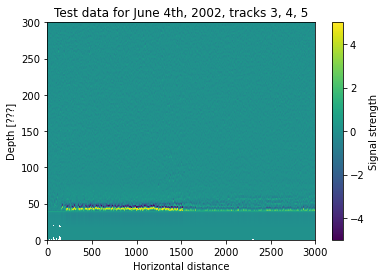

Additional informations: pic_elev=[0,1000,1600,2000,3000], elevation=[729,1525,1845,2037,2355]


In [7]:
#Append June 4 2002 data:
data_jun04_02proc_3_4=np.append(data_jun04_02proc_3,data_jun04_02proc_4,axis=1)
data_jun04_02proc_3_4_5=np.append(data_jun04_02proc_3_4,data_jun04_02proc_5,axis=1)

#Filter the data for plotting
data_jun04_02proc_3_4_5[abs(data_jun04_02proc_3_4_5)<0.005]=np.nan
data_jun04_02proc_3_4_5[abs(data_jun04_02proc_3_4_5)>5]=np.nan
data_jun04_02proc_3_4_5

#Plot the data
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #

divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)

# Plot data_jun04_02proc_3_4_5
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(data_jun04_02proc_3_4_5)#,cmap=pyplot.get_cmap('gray'),norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(0, 300)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for June 4th, 2002, tracks 3, 4, 5')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------
print('Additional informations: pic_elev=[0,1000,1600,2000,3000], elevation=[729,1525,1845,2037,2355]')


### 2. June 04 2020, processed traces 52, 53

We have three variables stored in it: latitude, longitude, data


<ipython-input-8-a9471d5e7267>:33: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)


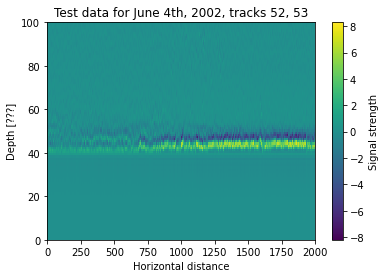

Additional informations: pic_elev=[0,1000,2000], elevation=[1951,1671,1361]


In [8]:
#Load a data
jun04_02proc_52= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//jun04_02proc_52.mat')
jun04_02proc_53= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//jun04_02proc_53.mat')

print('We have three variables stored in it: latitude, longitude, data')
#Store the data into subdatasets
data_jun04_02proc_52=jun04_02proc_52['data']
lat_jun04_02proc_52=jun04_02proc_52['latitude']
lon_jun04_02proc_52=jun04_02proc_52['longitude']

data_jun04_02proc_53=jun04_02proc_53['data']
lat_jun04_02proc_53=jun04_02proc_53['latitude']
lon_jun04_02proc_53=jun04_02proc_53['longitude']

#Append June 4 2002 data:
data_jun04_02proc_52_53=np.append(data_jun04_02proc_52,data_jun04_02proc_53,axis=1)

#Filter the data for plotting
#data_jun04_02proc_52_53[abs(data_jun04_02proc_52_53)<0.005]=np.nan
#data_jun04_02proc_52_53[abs(data_jun04_02proc_52_53)>5]=np.nan
#data_jun04_02proc_52_53

#Plot the data
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #

divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)

# Plot data_jun04_02proc_3_4_5
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(data_jun04_02proc_52_53)#,cmap=pyplot.get_cmap('gray'),norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(0, 100)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for June 4th, 2002, tracks 52, 53')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------
print('Additional informations: pic_elev=[0,1000,2000], elevation=[1951,1671,1361]')

### The resolution for June 4th, 2002 looks very poor

### 3. May 18th, 2002, traces 3, 4, 5

In [22]:
may18_02_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may18_02_3.mat')
may18_02_3

may18_02_4 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may18_02_4.mat')
may18_02_4

may18_02_5 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may18_02_5.mat')
may18_02_5

print('We have two variables stored in it: filtfin, timearr')

#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may18_02_3_filtfin=may18_02_3['filtfin']
may18_02_3_timearr=may18_02_3['timearr']

We have two variables stored in it: filtfin, timearr


<ipython-input-11-ceeaf17cca64>:9: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)


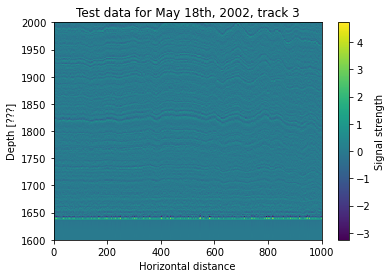

Data for May 18 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!


In [11]:
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #
divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)

#Plot filtfin for trace 3
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may18_02_3_filtfin)#,cmap=mymap,norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(1600, 2000)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 18th, 2002, track 3')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

print('Data for May 18 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!')


In [12]:
#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may18_02_4 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may18_02_4.mat')

may18_02_4_filtfin=may18_02_4['filtfin']
may18_02_4_timearr=may18_02_4['timearr']

#Filter the data for plotting
#may18_02_4_filtfin[abs(may18_02_4_filtfin)<0.05]=np.nan
#may18_02_4_filtfin[abs(may18_02_4_filtfin)>5]=np.nan
may18_02_4_filtfin

array([[ 4.90714788e-54,  4.91494118e-54,  1.47542938e-54, ...,
         2.43725168e-54,  3.21014734e-54,  4.60730727e-54],
       [ 6.08000753e-54,  6.03602861e-54,  2.00165052e-54, ...,
         3.07127344e-54,  3.94959745e-54,  5.69680251e-54],
       [ 7.27992167e-54,  7.17710225e-54,  2.55902020e-54, ...,
         3.72555974e-54,  4.70305896e-54,  6.81014796e-54],
       ...,
       [-2.00705167e-02,  3.02797564e-02, -1.27827323e-01, ...,
         6.56348515e-02, -1.77759461e-01,  1.92545718e-03],
       [ 1.15940781e-01,  1.21624624e-01, -1.90750488e-02, ...,
         1.61336336e-01,  1.64190952e-01,  1.85178211e-01],
       [ 6.64665025e-03,  8.72117301e-03,  8.74029406e-03, ...,
         2.17530224e-02,  1.28836384e-02, -7.74918018e-03]])

<ipython-input-14-1fcc65bbd6d5>:8: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)


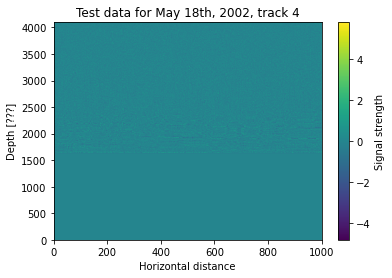

In [14]:
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))
# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #
divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)

#Plot filtfin for trace 4
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may18_02_4_filtfin)#,cmap=mymap,norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
#pyplot.ylim(0, 100)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 18th, 2002, track 4')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

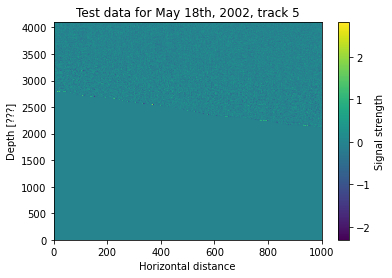

In [15]:
#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may18_02_5_filtfin=may18_02_5['filtfin']
may18_02_5_timearr=may18_02_5['timearr']
may18_02_5_filtfin
#Plot filtfin for trace 5
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may18_02_5_filtfin)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
#pyplot.ylim(0, 100)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 18th, 2002, track 5')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

### 4. May 18th, 2002, traces 3, 4, 5

In [16]:
### 3. May 24th, 2002

may24_02_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may24_02_3.mat')
may24_02_4 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may24_02_4.mat')
may24_02_5 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may24_02_5.mat')

may24_02_5
print('We have two variables stored in it: filtfin, timearr')

We have two variables stored in it: filtfin, timearr


In [17]:
#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may24_02_5_filtfin=may24_02_5['filtfin']
may24_02_5_timearr=may24_02_5['timearr']

#Filter the data for plotting
#may24_02_5_filtfin[abs(may24_02_5_filtfin)<0.05]=np.nan
#may24_02_5_filtfin[abs(may24_02_5_filtfin)>5]=np.nan
may24_02_5_filtfin

array([[-3.76806454e-68, -3.96650711e-68, -3.99698385e-68, ...,
         5.97661869e-69,  6.23269765e-69,  6.64981135e-69],
       [-3.87683077e-68, -4.29436159e-68, -4.16987962e-68, ...,
         5.82537156e-69,  6.88459889e-69,  7.11678518e-69],
       [-3.90138416e-68, -4.56185685e-68, -4.26107300e-68, ...,
         5.49762574e-69,  7.45978476e-69,  7.47160631e-69],
       ...,
       [ 7.97887656e-02,  4.17132520e-02,  7.10179419e-02, ...,
        -1.80045500e-02, -6.57040246e-02, -1.13077934e-01],
       [ 2.32501476e-02,  1.15717916e-02, -4.15609702e-02, ...,
         1.60442791e-02, -8.27366757e-02, -8.36683339e-02],
       [ 3.24654353e-02,  1.90762952e-02, -1.70427280e-02, ...,
        -2.01541015e-02, -9.08981041e-03,  8.87116903e-03]])

<ipython-input-18-fe751b843ae2>:11: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-0.005, vcenter=0, vmax=0.005)


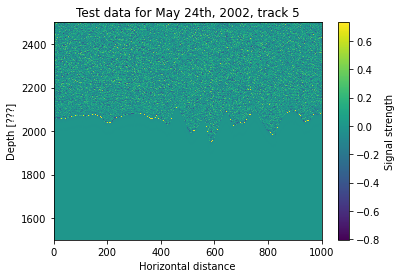

Data for May 24 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!


In [18]:
#Plot may24_02_5_filtfin
#Look for data in the 65 < lat < 70 and -50 < lon <-45 square to look for ice slabs
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #
divnorm = mcolors.DivergingNorm(vmin=-0.005, vcenter=0, vmax=0.005)

#Plot filtfin for trace 3
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may24_02_5_filtfin)#,cmap=mymap,norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(1500, 2500)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 24th, 2002, track 5')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

print('Data for May 24 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!')


### 5. May 30th, 2002, traces 3, 4, 5

In [19]:
may30_02_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may30_02_3.mat')
may30_02_4 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may30_02_4.mat')
may30_02_5 = scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2002//may30_02_5.mat')

may30_02_5
print('We have two variables stored in it: filtfin, timearr')

We have two variables stored in it: filtfin, timearr


In [20]:
#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may30_02_5_filtfin=may30_02_5['filtfin']
may30_02_5_timearr=may30_02_5['timearr']

#Filter the data for plotting
#may24_02_5_filtfin[abs(may24_02_5_filtfin)<0.05]=np.nan
#may24_02_5_filtfin[abs(may24_02_5_filtfin)>5]=np.nan
may30_02_5_filtfin

array([[ 5.71769377e-56,  7.03356240e-56,  7.53078184e-56, ...,
        -1.62418227e-56, -1.58708549e-56, -1.64395560e-56],
       [ 6.41669023e-56,  7.88373951e-56,  8.58840666e-56, ...,
        -1.73980489e-56, -1.68037665e-56, -1.75037999e-56],
       [ 7.05869635e-56,  8.66252629e-56,  9.58913054e-56, ...,
        -1.82824250e-56, -1.74449301e-56, -1.82788222e-56],
       ...,
       [ 7.53190069e-02,  8.46845428e-02,  8.96923524e-02, ...,
        -4.59518731e-04, -1.78037077e-01, -3.30858525e-01],
       [ 9.22816260e-02, -3.68157230e-02,  1.44350333e-01, ...,
         1.31507701e-01, -1.69108898e-02, -1.77429171e-01],
       [ 5.41021542e-03, -1.57951847e-02, -2.42667395e-02, ...,
         2.21321016e-02, -6.40774455e-03, -1.70609305e-02]])

<ipython-input-21-3befb4fbb314>:11: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-0.005, vcenter=0, vmax=0.005)


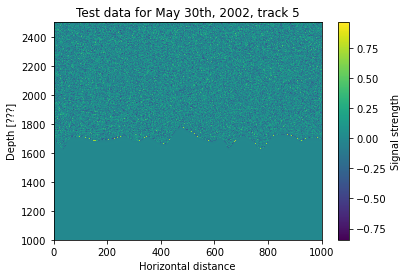

Data for May 30 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!


In [21]:
#Plot may30_02_5_filtfin
#Look for data in the 65 < lat < 70 and -50 < lon <-45 square to look for ice slabs
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #
divnorm = mcolors.DivergingNorm(vmin=-0.005, vcenter=0, vmax=0.005)

#Plot filtfin for trace 3
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may30_02_5_filtfin)#,cmap=mymap,norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(1000, 2500)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 30th, 2002, track 5')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

print('Data for May 30 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!')

Let's compare with 2010 data to see how it looks like, and benefit from this to do a quick comparison between the data stored in the different files.
Comparison between data stored in the 2002 and 2010 dataset in the following table. In blue what I believe to be identical variables.

| 2002 | 2002 | 2002 | 2002 | 2002 | 2002 | 2002 | 2002 | 2010 |
|------|------|------|------|------|------|------|------|------|
|   `may18_02_gps_latlontime.mat`   |   `may18_02_3.mat`    |   `may24_02s_latlontime.mat`   |   `may24_02_3.mat`   |   `may30_02_latlontime.mat`   |   `may30_02_3.mat`   |   `jun04_02_latlontime.mat`   |   `jun04_02proc_3.mat`   | `Data_20100507_01_009.mat` |
| seconds   |    /    | seconds   |    /    | seconds  |     /     | seconds  |     /     | Time |
| lat_gps   |    /    | lat_gps   |    /    | lat_gps  |     /     | lat_gps  | latitude  | Latitude |
| lon_gps   |    /    | lon_gps   |    /    | lon_gps  |     /     | lon_gps  | longitude | Longitude |
| alt_gps   |    /    | elh       |    /    | elh      |     /     | elh      |     /     | Elevation |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     |  Roll |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     | Pitch |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     | Heading |
| time_gps  |    /    | time_gps  |    /    | time_gps |     /     | time_gps |     /     | GPS_time |
|   /       |    /    |   /       |    /    |  /       |     /     |    /     |   <font color=blue> data </font>    | <font color=blue> Data </font> |
| useconds  |    /    | useconds  |    /    | useconds |     /     | useconds |     /     |  /  |
|   /       | <font color=blue> filtfin </font> |   /       | <font color=blue> filtfin </font> |   /      |  <font color=blue> filtfin </font>  |    /     |     /     |   /   |
|   /       | timearr |   /       | timearr |   /      |  timearr  |    /     |     /     |   /   |
|   /       |    /    |   /       |    /    |   /      |     /     |    /     |     /     | And other parameters |

### Conclusions about 2002 datatset
- I have a pdf file for quickly identify locations in which I am interested in only for June 4th
- We miss essential variables such as `Time` and `Roll`. For the former, it might be possible to retreive it for May18, May24, May30 with the timearr variable but not sure about that. Maybe I could get the iarcraft roll from other sensors??
- On both plots of June 4th, 2002: bright reflection in the ablation zone, then we start to see internal layering at elevation ~1500m, and we see these layers up to the end of the plot (evelation ~2355m). However, no clear evidence of ice slabs. How to calibrate these data for ice slabs identification??

### 2002 might be very challenging without additional information.

Let's show an example of 2010 dataset to see the differences between 2002 and 2010 datasets and see how an ice slab looks like

In [22]:
#Load a 2010 dataset
dset_20100507_01_009= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2010_Greenland_P3//CSARP_qlook//20100507_01//Data_20100507_01_009.mat')
data_20100507_01_009=dset_20100507_01_009['Data']

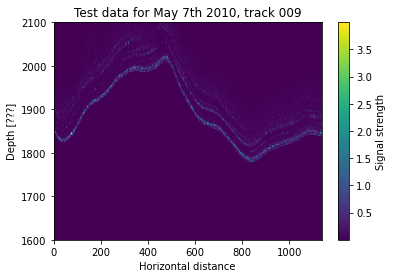

Additional informations: this flight is a traigth line, a region where we do have ice slabs.
pic_elev=[0,1100],elevation=[1694,1778]


In [25]:
# Plot dset_20100507_01_009
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(data_20100507_01_009)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(1600, 2100)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 7th 2010, track 009')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------
print('Additional informations: this flight is a traigth line, a region where we do have ice slabs.')
print('pic_elev=[0,1100],elevation=[1694,1778]')

## 2003
We have dates where there is data: May 9, 11, 12, 13, 14, 15. All of them have an associated pdf file.
### Let's investgate the gpslatlontime files

In [15]:
#load all the files
may09_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may09_03_gpslatlontime.mat')
may11_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may11_03_gpslatlontime.mat')
may12_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may12_03_gpslatlontime.mat')
may13_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13_03_gpslatlontime.mat')
may14_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may14_03_gpslatlontime.mat')
may15_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may15_03_gpslatlontime.mat')

print('All gpslatlontime files are identical in 2003!')

FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13_03_gpslatlontime.mat'

| May 09th 2003 | May 11th 2003 | May 12th 2003 | May 13th 2003 | May 14th 2003 | May 15th 2003 || DATA May 15th 2003 |
|---------------|---------------|---------------|---------------|---------------|---------------||------------------- |
|`may09_03_gpslatlontime.mat`|`may11_03_gpslatlontime.mat`|`may12_03_gpslatlontime.mat`|`may13_03_gpslatlontime.mat`|`may14_03_gpslatlontime.mat`|`may15_03_gpslatlontime.mat`||`may09_03_3.mat`|
|    seconds    |    seconds    |    seconds    |    seconds    |    seconds    |    seconds    ||          /         |
|    useconds   |    useconds   |    useconds   |    useconds   |    useconds   |    useconds   ||          /         |
|    lat_gps    |    lat_gps    |    lat_gps    |    lat_gps    |    lat_gps    |    lat_gps    ||          /         |
|    lon_gps    |    lon_gps    |    lon_gps    |    lon_gps    |    lon_gps    |    lon_gps    ||          /         |
|    time_gps   |    time_gps   |    time_gps   |    time_gps   |    time_gps   |    time_gps   ||          /         |
|       /       |       /       |       /       |       /       |       /       |       /       ||        filtfi      |
|       /       |       /       |       /       |       /       |       /       |       /       ||        timearr     |

## Let's investigate what is stored in these datasets
### 1. May 9th, 2003, trace n°3.This trace crosses and ice slabs region

In [28]:
may09_03_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may09_03_3.mat')
print('We have two variables stored in it: filtfin, timearr')

We have two variables stored in it: filtfin, timearr


In [29]:
#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may09_03_3_filtfin=may09_03_3['filtfin']
may09_03_3_timearr=may09_03_3['timearr']

<ipython-input-30-5da4f89db20c>:10: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-0.00000000005, vcenter=0, vmax=0.00000000005)


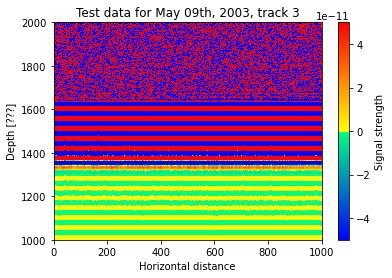

Data for May 09 2003 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!
pic_elev=[0,1000],elevation=[1560,2015]


In [30]:
#Plot may09_03_3_filtfin
# --------------------- Build one colormap combining two -------------------- #
colors1 = pyplot.cm.winter(np.linspace(0., 1, 128))
colors2 = pyplot.cm.autumn_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# --------------------- Build one colormap combining two -------------------- #
divnorm = mcolors.DivergingNorm(vmin=-0.00000000005, vcenter=0, vmax=0.00000000005)

#Plot filtfin for trace 3
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may09_03_3_filtfin,cmap=mymap,norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
pyplot.ylim(1000, 2000)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 09th, 2003, track 3')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

print('Data for May 09 2003 may be usable if I find the corresponding lat/lon. I guess I could do that from the gps_lat_lon datafiles!')
print('pic_elev=[0,1000],elevation=[1560,2015]')

### 2. May 12th, 2003, trace n°1 and 2. Trace 1 starts in the ablation zone, trace 2 has some part within the percolation zone and ends in the accumulation zone (at 2133m)

In [13]:
#Load a data
may12_03_1= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may12_03_1.mat')
may12_03_2= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may12_03_2.mat')
#may12_03_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may12_03_3.mat')

print('We have two variables stored in it: filtfin, timearr')
#Let's do a test with the variable 'filtfin', which is the only one who is a matrix
may12_03_1_filtfin=may12_03_1['filtfin']
may12_03_2_filtfin=may12_03_2['filtfin']
#may12_03_3_filtfin=may12_03_3['filtfin']

#Append June 4 2002 data:
may12_03_1_2=np.append(may12_03_1_filtfin,may12_03_2_filtfin,axis=1)
#may12_03_1_2_3=np.append(may12_03_1_2,may12_03_3_filtfin,axis=1)
#may12_03_1_2_3

We have two variables stored in it: filtfin, timearr


We have two variables stored in it: filtfin, timearr


<ipython-input-31-4c959a1787f6>:27: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mcolors.DivergingNorm(vmin=-3, vcenter=0, vmax=3)


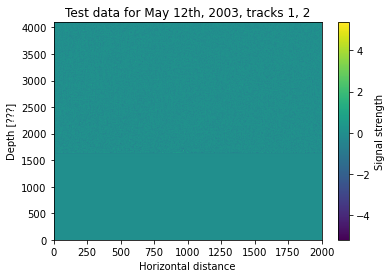

Additional informations: pic_elev=[0,1000,2000], elevation=[1286,1750,2131]


In [31]:
# Plot data_jun04_02proc_3_4_5
pyplot.figure()
#Change the size of the figure
#pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(may12_03_1_2)#,cmap=pyplot.get_cmap('gray'),norm=divnorm)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
#pyplot.ylim(0, 100)
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for May 12th, 2003, tracks 1, 2')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------
print('Additional informations: pic_elev=[0,1000,2000], elevation=[1286,1750,2131]')

|      2003      |      2003      |     2003       |            2003            |
|----------------|----------------|----------------|----------------------------|
|`may09_03_3.mat`|`may12_03_1.mat`|`may12_03_2.mat`|`may12_03_gpslatlontime.mat`|
|       /        |       /        |       /        |          seconds           |
|       /        |       /        |       /        |          useconds          |
|       /        |       /        |       /        |          lat_gps           |
|       /        |       /        |       /        |          lon_gps           |
|       /        |       /        |       /        |          time_gps          |
|    filtfi      |    filtfi      |    filtfi      |             /              |
|    timearr     |    timearr     |    timearr     |             /              |

### All files where the data are stored looks to be identical in 2003!
Let's compare the time_gps and timearr variables

In [14]:
may12_03_1_timearr=may12_03_1['timearr']
may12_03_timegps=may12_03_gpslatlontime['time_gps']

print(may12_03_1_filtfin.shape)
print('This means that the depth is of dimension 4095. However we do not have any variable related to the depth')

NameError: name 'may12_03_gpslatlontime' is not defined

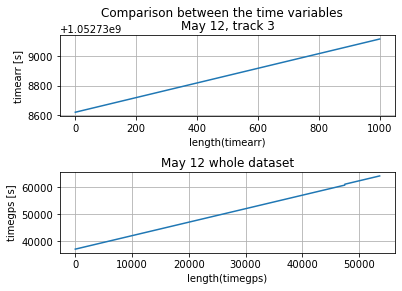

In [38]:
#Plot the GPS time
fig, axs = pyplot.subplots(2)
fig.suptitle('Comparison between the time variables')
axs[0].plot(np.arange(may12_03_1_timearr.size),may12_03_1_timearr.reshape((may12_03_1_timearr.size,)))
axs[0].set_title('May 12, track 3')
axs[0].set(xlabel='length(timearr)',ylabel='timearr [s]')
axs[0].grid()

axs[1].plot(np.arange(may12_03_timegps.size),may12_03_timegps.reshape((may12_03_timegps.size,)))
axs[1].set_title('May 12 whole dataset')
axs[1].set(xlabel='length(timegps)',ylabel='timegps [s]')
axs[1].grid()

pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.7)

### Investigate all the variables having a time dimension to see if I can retreive the time for any trace. I have to choose the date for which I want to do that, which is May 13, 2003.

In [11]:
#load individual data
may13_03_0= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_0.mat')
may13_03_1= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_1.mat')
may13_03_2= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_2.mat')
may13_03_3= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_3.mat')
may13_03_4= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_4.mat')
may13_03_5= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_5.mat')
may13_03_6= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_6.mat')
may13_03_7= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_7.mat')
may13_03_8= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_8.mat')
may13_03_9= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_9.mat')
may13_03_10= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_10.mat')
may13_03_11= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_11.mat')
may13_03_12= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_12.mat')
may13_03_13= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_13.mat')
may13_03_14= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_14.mat')
may13_03_15= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_15.mat')
may13_03_16= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_16.mat')
may13_03_17= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_17.mat')
may13_03_18= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_18.mat')
may13_03_19= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_19.mat')
may13_03_20= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_20.mat')
may13_03_21= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_21.mat')
may13_03_22= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_22.mat')
may13_03_23= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_23.mat')
may13_03_24= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_24.mat')
may13_03_25= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_25.mat')
may13_03_26= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_26.mat')
may13_03_27= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_27.mat')
may13_03_28= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_28.mat')
may13_03_29= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_29.mat')
may13_03_30= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_30.mat')

#store the filtfin to obtain the length of the depth
may13_03_0_filtfin= may13_03_0['filtfin']
may13_03_1_filtfin= may13_03_1['filtfin']
may13_03_2_filtfin= may13_03_2['filtfin']
may13_03_3_filtfin= may13_03_3['filtfin']
may13_03_4_filtfin= may13_03_4['filtfin']
may13_03_5_filtfin= may13_03_5['filtfin']
may13_03_6_filtfin= may13_03_6['filtfin']
may13_03_7_filtfin= may13_03_7['filtfin']
may13_03_8_filtfin= may13_03_8['filtfin']
may13_03_9_filtfin= may13_03_9['filtfin']
may13_03_10_filtfin= may13_03_10['filtfin']
may13_03_11_filtfin= may13_03_11['filtfin']
may13_03_12_filtfin= may13_03_12['filtfin']
may13_03_13_filtfin= may13_03_13['filtfin']
may13_03_14_filtfin= may13_03_14['filtfin']
may13_03_15_filtfin= may13_03_15['filtfin']
may13_03_16_filtfin= may13_03_16['filtfin']
may13_03_17_filtfin= may13_03_17['filtfin']
may13_03_18_filtfin= may13_03_18['filtfin']
may13_03_19_filtfin= may13_03_19['filtfin']
may13_03_20_filtfin= may13_03_20['filtfin']
may13_03_21_filtfin= may13_03_21['filtfin']
may13_03_22_filtfin= may13_03_22['filtfin']
may13_03_23_filtfin= may13_03_23['filtfin']
may13_03_24_filtfin= may13_03_24['filtfin']
may13_03_25_filtfin= may13_03_25['filtfin']
may13_03_26_filtfin= may13_03_26['filtfin']
may13_03_27_filtfin= may13_03_27['filtfin']
may13_03_28_filtfin= may13_03_28['filtfin']
may13_03_29_filtfin= may13_03_29['filtfin']
may13_03_30_filtfin= may13_03_30['filtfin']

#store the timearr to obtain the length of the timearr variable
may13_03_0_timearr= may13_03_0['timearr']

#Load the gps latlontime file for May 13
may13_03_gpslatlontime= scipy.io.loadmat('C://Users//Nicolas Jullien//Documents//PhD//iceslabs_processing//iceslabs_MacFerrin//data//2003//may13//may13_03_gpslatlontime.mat')

#Print the sum of the shapes
print('The sum of the depths for all files in May 13 2003 is:')
print(may13_03_0_filtfin.shape[0]+may13_03_1_filtfin.shape[0]+may13_03_2_filtfin.shape[0]+may13_03_3_filtfin.shape[0]+may13_03_4_filtfin.shape[0]+may13_03_5_filtfin.shape[0]+may13_03_6_filtfin.shape[0]+may13_03_7_filtfin.shape[0]+may13_03_8_filtfin.shape[0]+may13_03_9_filtfin.shape[0]+may13_03_10_filtfin.shape[0]+may13_03_11_filtfin.shape[0]+may13_03_12_filtfin.shape[0]+may13_03_13_filtfin.shape[0]+may13_03_14_filtfin.shape[0]+may13_03_15_filtfin.shape[0]+may13_03_16_filtfin.shape[0]+may13_03_17_filtfin.shape[0]+may13_03_18_filtfin.shape[0]+may13_03_19_filtfin.shape[0]+may13_03_20_filtfin.shape[0]+may13_03_21_filtfin.shape[0]+may13_03_22_filtfin.shape[0]+may13_03_23_filtfin.shape[0]+may13_03_24_filtfin.shape[0]+may13_03_25_filtfin.shape[0]+may13_03_26_filtfin.shape[0]+may13_03_27_filtfin.shape[0]+may13_03_28_filtfin.shape[0]+may13_03_29_filtfin.shape[0]+may13_03_30_filtfin.shape[0])
print('The sum of the horizontal distance for all files in May 13 2003 is:')
print(may13_03_0_filtfin.shape[1]+may13_03_1_filtfin.shape[1]+may13_03_2_filtfin.shape[1]+may13_03_3_filtfin.shape[1]+may13_03_4_filtfin.shape[1]+may13_03_5_filtfin.shape[1]+may13_03_6_filtfin.shape[1]+may13_03_7_filtfin.shape[1]+may13_03_8_filtfin.shape[1]+may13_03_9_filtfin.shape[1]+may13_03_10_filtfin.shape[1]+may13_03_11_filtfin.shape[1]+may13_03_12_filtfin.shape[1]+may13_03_13_filtfin.shape[1]+may13_03_14_filtfin.shape[1]+may13_03_15_filtfin.shape[1]+may13_03_16_filtfin.shape[1]+may13_03_17_filtfin.shape[1]+may13_03_18_filtfin.shape[1]+may13_03_19_filtfin.shape[1]+may13_03_20_filtfin.shape[1]+may13_03_21_filtfin.shape[1]+may13_03_22_filtfin.shape[1]+may13_03_23_filtfin.shape[1]+may13_03_24_filtfin.shape[1]+may13_03_25_filtfin.shape[1]+may13_03_26_filtfin.shape[1]+may13_03_27_filtfin.shape[1]+may13_03_28_filtfin.shape[1]+may13_03_29_filtfin.shape[1]+may13_03_30_filtfin.shape[1])
#Print file characteristics

print('Dimension of the seconds variable in the file may13_03_gpslatlontime.mat')
print(may13_03_gpslatlontime['seconds'].shape)
print('Dimension of the useconds variable in the file may13_03_gpslatlontime.mat')
print(may13_03_gpslatlontime['useconds'].shape)
print('Dimension of the time_gps variable in the file may13_03_gpslatlontime.mat')
print(may13_03_gpslatlontime['time_gps'].shape)
print('Dimension of the latitude variable in the file may13_03_gpslatlontime.mat')
print(may13_03_gpslatlontime['lat_gps'].shape)
print('Dimension of the time_gps variable in the file may13_03_gpslatlontime.mat')
print(may13_03_gpslatlontime['lon_gps'].shape)
print(' ')
print('The size of the timearr (from individual track file) is:')
print(may13_03_0_timearr.shape)
print('The size of the filtfin (from individual track file) is:')
print(may13_03_0_filtfin.shape)

The sum of the depths for all files in May 13 2003 is:
126945
The sum of the horizontal distance for all files in May 13 2003 is:
30330
Dimension of the seconds variable in the file may13_03_gpslatlontime.mat
(1, 42377)
Dimension of the useconds variable in the file may13_03_gpslatlontime.mat
(1, 42377)
Dimension of the time_gps variable in the file may13_03_gpslatlontime.mat
(1, 42377)
Dimension of the latitude variable in the file may13_03_gpslatlontime.mat
(1, 42377)
Dimension of the time_gps variable in the file may13_03_gpslatlontime.mat
(1, 42377)
 
The size of the timearr (from individual track file) is:
(1, 1000)
The size of the filtfin (from individual track file) is:
(4095, 1000)


# Conclusion on 2003
There is no match between the sizes of the datasets.
### I do not know where this dataset size comes from: 42377, because 31*4095=126945
### I do not think that these time arrays give anything about the time related to the depth, but also the latitude and longitudes

### I have browsed around in the data I have on my computer and also on NSDIC repositories and CReSIS repositories and I cannot find additional information.

# To do:
1. Improve plotting Jun01_02.3, Jun01_02.4, Jun01_02.5: done
2. Plot Jun 04_02.52, Jun 04_02.52: done
3. Look for May data: done
4. Plot data from May: done
5. Gather information (logbooks, additional dataset?) and display it here. i think there is nothing for 2002, despite the pdf file for June 4th, 2002 : done
6. Do 3, 4, and 5 for 2003 : done

In [ ]:
pyplot.figure()
#Change the size of the figure
pyplot.rcParams["figure.figsize"]=20,20
color_map=pyplot.pcolor(data_test_june)
pyplot.ylabel('Depth [???]')
#pyplot.xticks(ticks=pd.Series(np.arange(0,len(lat_series),1)),labels=lat_series)
pyplot.xlabel('Horizontal distance')
#pyplot.yticks(ticks=pd.Series(np.arange(0,len(height_series),1)),labels=height_series)
pyplot.title('Test data for June 4th 2002, track 15')
cbar=pyplot.colorbar()
cbar.set_label('Signal strength')
pyplot.show()
# ---------

In [ ]:
Greenland_DEM = rasterio.open('C://Users//Nicolas Jullien//Documents//PhD//OIB//greenland_map//greenland_moisaic_100m_v3.0.tif')

In [ ]:
import rasterio
pyplot.imshow(Greenland_DEM.read(1), cmap='pink')
pyplot.show()